# DA PROJECT


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [4]:
# getting page data from url

name=[]
price=[]
details=[]
km_driven=[]
ownership=[]
location=[]
link=[]

for x in range(0,50):
    url=f"https://bikekharido.in/used-bikes-in-india/?sf_paged={x}"
    page=requests.get(url)
    soup =BeautifulSoup(page.text)
    for i in soup.find_all("div",class_='fl-post-column'):  #fl-post-title-old bikeListHead #fl-post-text
        if i:
            for j in i.find_all("h2",class_='fl-post-title-old bikeListHead'):
                if j:
                    name.append(j.text.strip('\n'))
                else:
                    name.append(np.nan)
            for j in i.find_all("span",class_='fw500 spanblock fsize17 fcblack'):# fw500 spanblock fsize17 fcblack
                if j:
                    price.append(j.text.strip('\n'))
                else:
                    price.append(np.nan)
            for j in i.find_all("div",class_='vehicleMetaDetails'):
                if j:
                    details.append(j.text.strip('\n').replace('\n',':'))
                else:
                    details.append(np.nan)
            for j in i.find_all("div",class_="fl-post-image productlistimage"):
                if j:
                    link.append(j.find_all('a')[0]['href'])
                else:
                    link.append(np.nan)
            for j in i.find_all("div",class_='fl-post-text'):
                if j:
                    details.append(j.text.strip('\n').replace('\n',':'))
                else:
                    details.append(np.nan)
        else:
            name.append(np.nan)
for i in details[::4]:
    km_driven.append(i.strip('km').strip('KM Driven: '))
for i in details[1::4]:
    ownership.append(i.strip('Ownership: '))
for i in details[2::4]:
    location.append(i[i.index(':')+1:])
df1=pd.DataFrame({'Name':name,'Price':price,'KM_driven':km_driven,'Ownership':ownership,'Location':location,'link':link})   



link

In [5]:
# remove duplicates

df=df1.drop_duplicates().reset_index().drop(columns='index')

In [6]:
df

,Name,Price,KM_driven,Ownership,Location,link
0,2023 Yezdi Roadster,"₹ 1,65,000",10000,First,Delhi,https://bikekharido.in/buy-used-bike/2023-yezd...
1,2019 Royal Enfield Thunderbird 350 ABS,"₹ 1,10,000",40000,Second,Noida,https://bikekharido.in/buy-used-bike/2019-roya...
2,2022 Hero Electric Optima CX Dual Battery,"₹ 80,000",5000,First,Kolkata,https://bikekharido.in/buy-used-bike/2022-hero...
3,2015 Mahindra Gusto DX,"₹ 17,000",35000,First,Mumbai,https://bikekharido.in/buy-used-bike/2015-mahi...
4,2014 Honda CB Trigger DLX,"₹ 45,000",30000,First,Mumbai,https://bikekharido.in/buy-used-bike/2014-hond...
...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,"₹ 35,000",70000,First,Ghaziabad,https://bikekharido.in/buy-used-bike/2016-hero...
584,2021 Hero Passion Pro XTec Drum,"₹ 63,000",15000,First,Chennai,https://bikekharido.in/buy-used-bike/2021-hero...
585,2021 Yamaha FZS-FI V3 STD Bluetooth,"₹ 1,00,000",36000,First,Ghaziabad,https://bikekharido.in/buy-used-bike/2021-yama...
586,2022 Royal Enfield Meteor 350 Fireball,"₹ 2,00,000",5000,First,Kolkata,https://bikekharido.in/buy-used-bike/2022-roya...


In [7]:
jo=[]
link=[]
registration_year=[]
make=[]
model=[]
km_driven=[]
fuel_type=[]
engine=[]
lo=[]

f=0
for i in df['link']:
    uri=i
    print(f)
    f=f+1
    page=requests.get(uri)
    soup =BeautifulSoup(page.text)
    jo.append(i)
    for i in soup.find_all("div",class_='veh_Info'):
        for j in i.find_all("li"):
            if j:
                jo.append(j.text.strip('\n'))
            else:
                jo.append(np.nan)
        if 'Location' in j.text:
                    break
link=jo[::8]
registration_year=jo[1::8]
make=jo[2::8]
model=jo[3::8]
km_driven=jo[4::8]
fuel_type=jo[5::8]
engine=jo[6::8]
lo=jo[7::8]


df2=pd.DataFrame({'link':link,'Registration_Year':registration_year,'Make':make,'Model':model,'KMs_Driven':km_driven,'Fuel_Type':fuel_type,'Engine':engine,'Location':lo})

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
df2

,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,https://bikekharido.in/buy-used-bike/2023-yezd...,Registration Year\n\n2023,Make\n\nYezdi,Model\n\nRoadster,KMs Driven\n\n10000,\nFuel Type\n\nPetrol,Engine\n\nN/A,Location\n\nDelhi
1,https://bikekharido.in/buy-used-bike/2019-roya...,Registration Year\n\n2019,Make\n\nRoyal Enfield,Model\n\nThunderbird 350,KMs Driven\n\n40000,\nFuel Type\n\nPetrol,Engine\n\nN/A,Location\n\nNoida
2,https://bikekharido.in/buy-used-bike/2022-hero...,Registration Year\n\n2022,Make\n\nHero Electric,Model\n\nOptima,KMs Driven\n\n5000,\nFuel Type\n\nPetrol,Engine\n\nN/A,Location\n\nKolkata
3,https://bikekharido.in/buy-used-bike/2015-mahi...,Registration Year\n\n2015,Make\n\nMahindra,Model\n\nGusto,KMs Driven\n\n35000,\nFuel Type\n\nPetrol,Engine\n\n109.6 cc,Location\n\nMumbai
4,https://bikekharido.in/buy-used-bike/2014-hond...,Registration Year\n\n2014,Make\n\nHonda,Model\n\nCB Trigger,KMs Driven\n\n30000,\nFuel Type\n\nPetrol,Engine\n\nN/A,Location\n\nMumbai
...,...,...,...,...,...,...,...,...
583,https://bikekharido.in/buy-used-bike/2016-hero...,Registration Year\n\n2016,Make\n\nHero,Model\n\nHunk,KMs Driven\n\n70000,\nFuel Type\n\nPetrol,Engine\n\n149 cc,Location\n\nGhaziabad
584,https://bikekharido.in/buy-used-bike/2021-hero...,Registration Year\n\n2021,Make\n\nHero,Model\n\nPassion Pro,KMs Driven\n\n15000,\nFuel Type\n\nPetrol,Engine\n\n110 cc,Location\n\nChennai
585,https://bikekharido.in/buy-used-bike/2021-yama...,Registration Year\n\n2021,Make\n\nYamaha,Model\n\nFZS-FI V3,KMs Driven\n\n36000,\nFuel Type\n\nPetrol,Engine\n\n149 cc,Location\n\nGhaziabad
586,https://bikekharido.in/buy-used-bike/2022-roya...,Registration Year\n\n2022,Make\n\nRoyal Enfield,Model\n\nMeteor 350,KMs Driven\n\n5000,\nFuel Type\n\nPetrol,Engine\n\n349 cc,Location\n\nKolkata


In [9]:
import re
df2.Registration_Year=df2.Registration_Year.apply(lambda x:re.findall(r'\d+',x)[0])
df2.Make=df2.Make.apply(lambda x:re.findall(r'Make\n\n(.*)',x)[0])
df2['Model'] = df2['Model'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)
df2.KMs_Driven= df2.KMs_Driven.apply(lambda x:x[0] if isinstance(x,list) and len(x)>0 else x)
df2.Fuel_Type=df2.Fuel_Type.apply(lambda x:re.findall(r'\s\nFuel\sType\n\n(.*)',x)[0])
df2.Engine=df2.Engine.apply(lambda x:re.findall(r'Engine\n\n(.*)',x)[0])
df2.Location=df2.Location.apply(lambda x:re.findall(r'Location\n\n(.*)',x)[0])


In [10]:
df2

,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Model\n\nRoadster,KMs Driven\n\n10000,Petrol,N/A,Delhi
1,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Model\n\nThunderbird 350,KMs Driven\n\n40000,Petrol,N/A,Noida
2,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Model\n\nOptima,KMs Driven\n\n5000,Petrol,N/A,Kolkata
3,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Model\n\nGusto,KMs Driven\n\n35000,Petrol,109.6 cc,Mumbai
4,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,Model\n\nCB Trigger,KMs Driven\n\n30000,Petrol,N/A,Mumbai
...,...,...,...,...,...,...,...,...
583,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Model\n\nHunk,KMs Driven\n\n70000,Petrol,149 cc,Ghaziabad
584,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Model\n\nPassion Pro,KMs Driven\n\n15000,Petrol,110 cc,Chennai
585,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,Model\n\nFZS-FI V3,KMs Driven\n\n36000,Petrol,149 cc,Ghaziabad
586,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Model\n\nMeteor 350,KMs Driven\n\n5000,Petrol,349 cc,Kolkata


In [11]:
df2.KMs_Driven=df2.KMs_Driven.apply(lambda x:re.findall(r'\d+',x))

In [12]:
df2.KMs_Driven= df2.KMs_Driven.apply(lambda x:x[0] if isinstance(x,list) and len(x)>0 else x)

In [13]:
df2

,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Model\n\nRoadster,10000,Petrol,N/A,Delhi
1,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Model\n\nThunderbird 350,40000,Petrol,N/A,Noida
2,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Model\n\nOptima,5000,Petrol,N/A,Kolkata
3,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Model\n\nGusto,35000,Petrol,109.6 cc,Mumbai
4,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,Model\n\nCB Trigger,30000,Petrol,N/A,Mumbai
...,...,...,...,...,...,...,...,...
583,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Model\n\nHunk,70000,Petrol,149 cc,Ghaziabad
584,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Model\n\nPassion Pro,15000,Petrol,110 cc,Chennai
585,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,Model\n\nFZS-FI V3,36000,Petrol,149 cc,Ghaziabad
586,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Model\n\nMeteor 350,5000,Petrol,349 cc,Kolkata


In [14]:
fin=df.merge(df2,how='left',on='link').drop(columns=['KM_driven','Location_x'])

In [15]:
fin

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location_y
0,2023 Yezdi Roadster,"₹ 1,65,000",First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Model\n\nRoadster,10000,Petrol,N/A,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,"₹ 1,10,000",Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Model\n\nThunderbird 350,40000,Petrol,N/A,Noida
2,2022 Hero Electric Optima CX Dual Battery,"₹ 80,000",First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Model\n\nOptima,5000,Petrol,N/A,Kolkata
3,2015 Mahindra Gusto DX,"₹ 17,000",First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Model\n\nGusto,35000,Petrol,109.6 cc,Mumbai
4,2014 Honda CB Trigger DLX,"₹ 45,000",First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,Model\n\nCB Trigger,30000,Petrol,N/A,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,"₹ 35,000",First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Model\n\nHunk,70000,Petrol,149 cc,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,"₹ 63,000",First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Model\n\nPassion Pro,15000,Petrol,110 cc,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,"₹ 1,00,000",First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,Model\n\nFZS-FI V3,36000,Petrol,149 cc,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,"₹ 2,00,000",First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Model\n\nMeteor 350,5000,Petrol,349 cc,Kolkata


In [16]:
fin=fin.rename(columns={'Location_y':'Location'})

In [17]:
fin1=fin.reindex()

In [18]:
fin.Price=fin.Price.apply(lambda x: x.replace(',','')).apply(lambda x: re.findall(r'\d+',x)[0]).astype(int)

In [19]:
fin['Model']=fin.Model.apply(lambda x: re.findall(r'Model\n\n(.*)',x))

In [20]:
fin['Model']=fin.Model.apply(lambda x: x[0] if isinstance(x,list) and len(x)>0 else x)

In [21]:
fin

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,2023 Yezdi Roadster,165000,First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Roadster,10000,Petrol,N/A,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,110000,Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Thunderbird 350,40000,Petrol,N/A,Noida
2,2022 Hero Electric Optima CX Dual Battery,80000,First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Optima,5000,Petrol,N/A,Kolkata
3,2015 Mahindra Gusto DX,17000,First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Gusto,35000,Petrol,109.6 cc,Mumbai
4,2014 Honda CB Trigger DLX,45000,First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,CB Trigger,30000,Petrol,N/A,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,35000,First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Hunk,70000,Petrol,149 cc,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,63000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Passion Pro,15000,Petrol,110 cc,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,100000,First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,FZS-FI V3,36000,Petrol,149 cc,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,200000,First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Meteor 350,5000,Petrol,349 cc,Kolkata


<Axes: xlabel='count', ylabel='Make'>

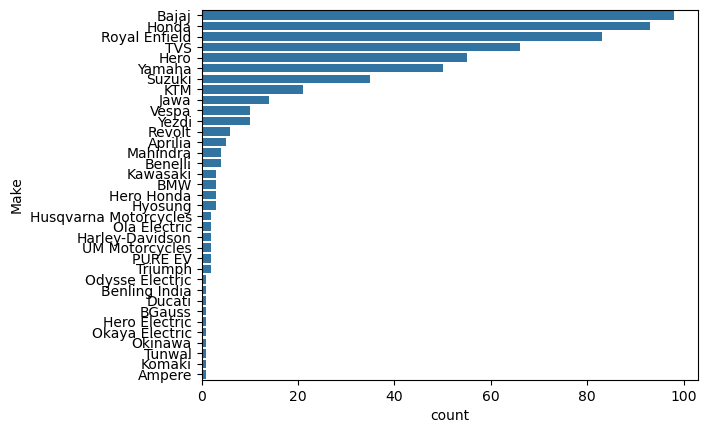

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.barplot(y=fin['Ownership'].value_counts().index,x=fin['Ownership'].value_counts())

sns.barplot(y=fin['Make'].value_counts().index,x=fin['Make'].value_counts())

<Axes: xlabel='count', ylabel='Ownership'>

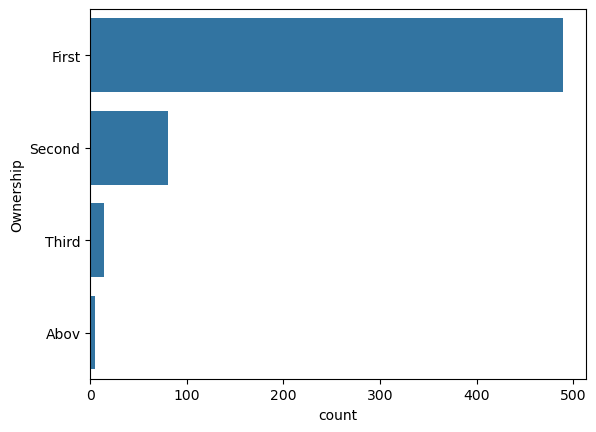

In [23]:
sns.barplot(y=fin['Ownership'].value_counts().index,x=fin['Ownership'].value_counts())

In [24]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               588 non-null    object
 1   Price              588 non-null    int32 
 2   Ownership          588 non-null    object
 3   link               588 non-null    object
 4   Registration_Year  588 non-null    object
 5   Make               588 non-null    object
 6   Model              588 non-null    object
 7   KMs_Driven         588 non-null    object
 8   Fuel_Type          588 non-null    object
 9   Engine             588 non-null    object
 10  Location           588 non-null    object
dtypes: int32(1), object(10)
memory usage: 48.4+ KB


In [25]:
fin.Engine1=fin.Engine

C:\Users\punee\AppData\Local\Temp\ipykernel_14760\4265674571.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fin.Engine1=fin.Engine


In [26]:
fin.Engine1=fin.Engine
fin['Engine1']=fin.Engine1.map({'N/A':'0'})
fin['Engine1']=fin.Engine1.apply(lambda x: re.findall(r'(.*)\scc$',x))#[0] if isinstance(x,list) and len(x)>0 else x).astype(float)


In [27]:
fin['Engine1']=fin['Engine1'].apply(lambda x: x[0] if isinstance(x,list) and len(x)>0 else '0').replace(',','')

In [28]:
fin['Engine1']=fin['Engine1'].apply(lambda x:x.replace(',','') if ',' in x else x)

In [29]:
fin['Engine']=fin['Engine1'].astype('float')

In [30]:
fin.drop(columns=['Engine1'],inplace=True)

In [31]:
fin

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,2023 Yezdi Roadster,165000,First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Roadster,10000,Petrol,0.0,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,110000,Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Thunderbird 350,40000,Petrol,0.0,Noida
2,2022 Hero Electric Optima CX Dual Battery,80000,First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Optima,5000,Petrol,0.0,Kolkata
3,2015 Mahindra Gusto DX,17000,First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Gusto,35000,Petrol,109.6,Mumbai
4,2014 Honda CB Trigger DLX,45000,First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,CB Trigger,30000,Petrol,0.0,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,35000,First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Hunk,70000,Petrol,149.0,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,63000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Passion Pro,15000,Petrol,110.0,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,100000,First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,FZS-FI V3,36000,Petrol,149.0,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,200000,First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Meteor 350,5000,Petrol,349.0,Kolkata


In [32]:
fin['Registration_Year']=fin['Registration_Year'].astype(int)

In [33]:
fin['KMs_Driven']=fin['KMs_Driven'].apply(lambda x: '0' if isinstance(x,list)  else x).apply(int)

In [34]:
fin

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,2023 Yezdi Roadster,165000,First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Roadster,10000,Petrol,0.0,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,110000,Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Thunderbird 350,40000,Petrol,0.0,Noida
2,2022 Hero Electric Optima CX Dual Battery,80000,First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Optima,5000,Petrol,0.0,Kolkata
3,2015 Mahindra Gusto DX,17000,First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Gusto,35000,Petrol,109.6,Mumbai
4,2014 Honda CB Trigger DLX,45000,First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,CB Trigger,30000,Petrol,0.0,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,35000,First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Hunk,70000,Petrol,149.0,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,63000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Passion Pro,15000,Petrol,110.0,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,100000,First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,FZS-FI V3,36000,Petrol,149.0,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,200000,First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Meteor 350,5000,Petrol,349.0,Kolkata


<Axes: >

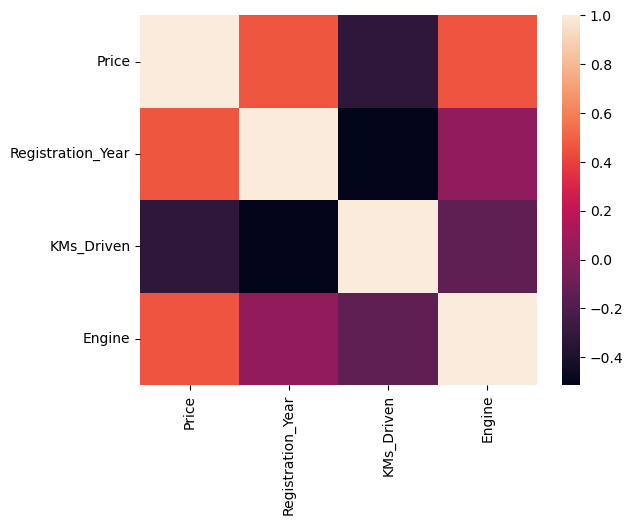

In [35]:
sns.heatmap(fin.corr(numeric_only=True))

In [36]:
fin.corr(numeric_only=True)

,Price,Registration_Year,KMs_Driven,Engine
Price,1.000000,0.466148,-0.326594,0.457206
Registration_Year,0.466148,1.000000,-0.512771,0.041908
KMs_Driven,-0.326594,-0.512771,1.000000,-0.135618
Engine,0.457206,0.041908,-0.135618,1.000000


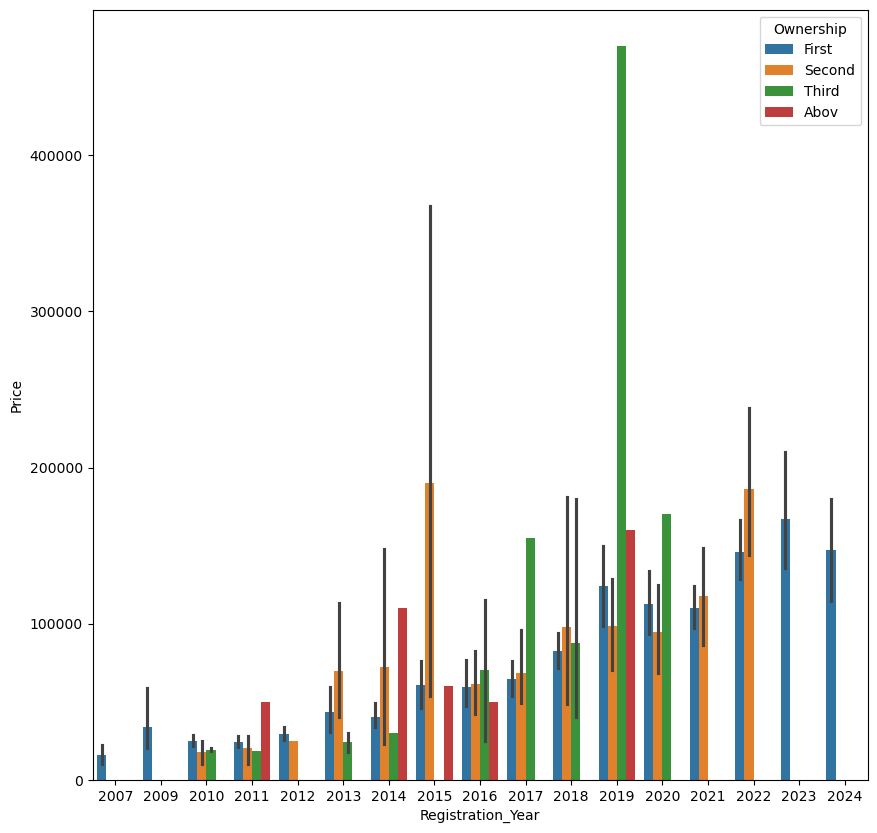

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(data=fin,x='Registration_Year',y='Price',hue='Ownership',estimator='mean')
plt.show()

<Axes: xlabel='Fuel_Type', ylabel='Price'>

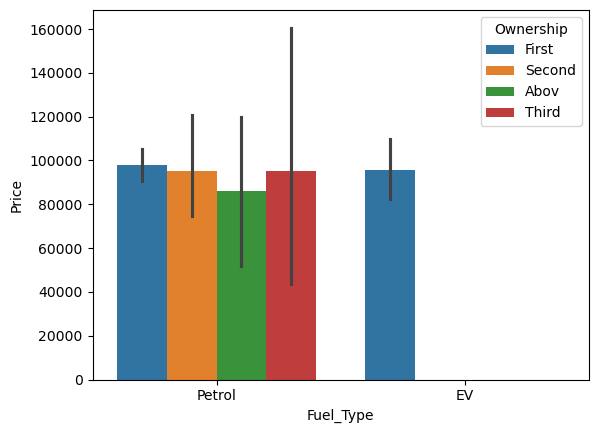

In [38]:
sns.barplot(data=fin,x='Fuel_Type',y='Price',hue='Ownership',estimator='mean')

In [39]:
fin.to_csv('bikekarido_old.csv',sep='|')

In [40]:
#bajaj-pulsar-ns400z
fin

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,2023 Yezdi Roadster,165000,First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Roadster,10000,Petrol,0.0,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,110000,Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Thunderbird 350,40000,Petrol,0.0,Noida
2,2022 Hero Electric Optima CX Dual Battery,80000,First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Optima,5000,Petrol,0.0,Kolkata
3,2015 Mahindra Gusto DX,17000,First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Gusto,35000,Petrol,109.6,Mumbai
4,2014 Honda CB Trigger DLX,45000,First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,CB Trigger,30000,Petrol,0.0,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,35000,First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Hunk,70000,Petrol,149.0,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,63000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Passion Pro,15000,Petrol,110.0,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,100000,First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,FZS-FI V3,36000,Petrol,149.0,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,200000,First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Meteor 350,5000,Petrol,349.0,Kolkata


In [41]:
fin

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,2023 Yezdi Roadster,165000,First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Roadster,10000,Petrol,0.0,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,110000,Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Thunderbird 350,40000,Petrol,0.0,Noida
2,2022 Hero Electric Optima CX Dual Battery,80000,First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Optima,5000,Petrol,0.0,Kolkata
3,2015 Mahindra Gusto DX,17000,First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Gusto,35000,Petrol,109.6,Mumbai
4,2014 Honda CB Trigger DLX,45000,First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,CB Trigger,30000,Petrol,0.0,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,35000,First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Hunk,70000,Petrol,149.0,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,63000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Passion Pro,15000,Petrol,110.0,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,100000,First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,FZS-FI V3,36000,Petrol,149.0,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,200000,First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Meteor 350,5000,Petrol,349.0,Kolkata


In [42]:
## Second hand bikes data:
fin.to_csv('secondhandbike.csv',sep='|')

In [43]:
fin

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,2023 Yezdi Roadster,165000,First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Roadster,10000,Petrol,0.0,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,110000,Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Thunderbird 350,40000,Petrol,0.0,Noida
2,2022 Hero Electric Optima CX Dual Battery,80000,First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Optima,5000,Petrol,0.0,Kolkata
3,2015 Mahindra Gusto DX,17000,First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Gusto,35000,Petrol,109.6,Mumbai
4,2014 Honda CB Trigger DLX,45000,First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,CB Trigger,30000,Petrol,0.0,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,35000,First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Hunk,70000,Petrol,149.0,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,63000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Passion Pro,15000,Petrol,110.0,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,100000,First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,FZS-FI V3,36000,Petrol,149.0,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,200000,First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Meteor 350,5000,Petrol,349.0,Kolkata


In [44]:
fin.columns

Index(['Name', 'Price', 'Ownership', 'link', 'Registration_Year', 'Make',
       'Model', 'KMs_Driven', 'Fuel_Type', 'Engine', 'Location'],
      dtype='object')

# Price insights

Ownership
First     97879.629857
Second    95363.725000
Third     95042.785714
Abov      85999.800000
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Ownership'>

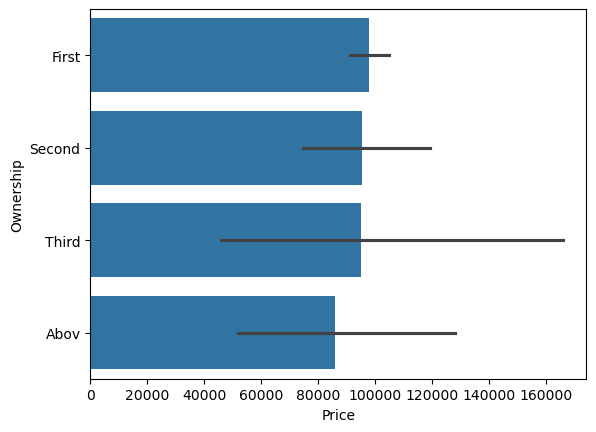

In [45]:
# getting average price of first, second and third hand bikes, based on ownership
print(fin.groupby('Ownership').Price.mean().sort_values(ascending=False))
sns.barplot(data=fin.sort_values('Price',ascending=False),y='Ownership',x='Price')##fin.groupby('Ownership').Price.mean()


In [46]:
## total average price of all the bikes
fin.Price.mean()

97368.76700680272

In [47]:
## min of price
fin.Price.min()

10000

In [48]:
## max of price
fin.Price.max()

850000

<Axes: xlabel='Price', ylabel='None'>

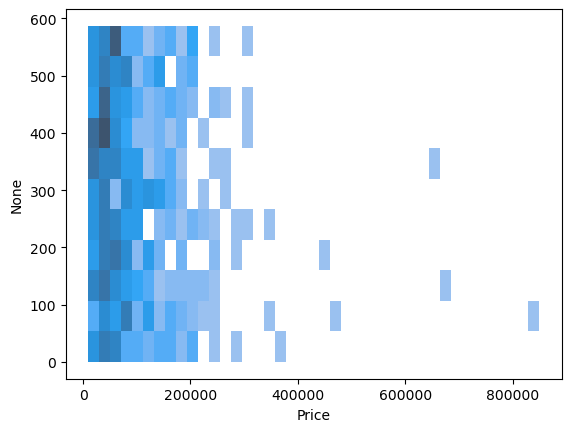

In [49]:
sns.histplot(data=fin,x='Price',y=fin.index,kde=True)

In [50]:
## Top 5 bikes based on price
fin.sort_values('Price',ascending=False).head(6)

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
77,2023 Hero Splendor Plus i3s,850000,First,https://bikekharido.in/buy-used-bike/2023-hero...,2023,Hero,Splendor Plus,90000,Petrol,97.2,Bangalore
112,2015 Ducati Monster 795 STD,685000,Second,https://bikekharido.in/buy-used-bike/2015-duca...,2015,Ducati,Monster 795,19200,Petrol,0.0,Delhi
337,2022 Kawasaki Z650RS,650000,First,https://bikekharido.in/buy-used-bike/2022-kawa...,2022,Kawasaki,Z650RS,800,Petrol,649.0,Delhi
94,2019 Benelli TNT 600i BS4 ABS BS4,470000,Third,https://bikekharido.in/buy-used-bike/2019-bene...,2019,Benelli,TNT 600i BS4,20000,Petrol,600.0,Delhi
193,2018 Harley-Davidson Street 750 STD,450000,Second,https://bikekharido.in/buy-used-bike/2018-harl...,2018,Harley-Davidson,Street 750,15000,Petrol,0.0,Bangalore
52,2023 Kawasaki Ninja 300,365000,First,https://bikekharido.in/buy-used-bike/2023-kawa...,2023,Kawasaki,Ninja 300,1125,Petrol,296.0,Mumbai


In [51]:
## last 5 bikes based on price
fin.sort_values('Price',ascending=True).head(5)

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
582,2010 Honda Activa 2009-2014 STD 2009-2014,10000,Second,https://bikekharido.in/buy-used-bike/2010-hond...,2010,Honda,Activa 2009-2014,60000,Petrol,124.0,Indore
487,2007 Bajaj Avenger Street 160,10000,First,https://bikekharido.in/buy-used-bike/2007-baja...,2007,Bajaj,Avenger Street 160,60000,Petrol,160.0,Pune
202,2011 Hero Honda CD Dawn,10000,Second,https://bikekharido.in/buy-used-bike/2011-hero...,2011,Hero Honda,CD Dawn,100000,Petrol,0.0,Hyderabad
39,2012 Hero Maestro 110cc,12000,First,https://bikekharido.in/buy-used-bike/2012-hero...,2012,Hero,Maestro,70000,Petrol,0.0,Chennai
291,2011 Suzuki Access 125 BS4,16000,First,https://bikekharido.in/buy-used-bike/2011-suzu...,2011,Suzuki,Access 125 BS4,30000,Petrol,124.0,Faridabad


In [52]:
## average based on manufacturer
a=fin.groupby(['Make']).Price.mean().sort_values(ascending=False).reset_index()
b=fin.groupby(['Make']).Price.count().sort_values(ascending=False).reset_index()
c=pd.merge(a,b,how='inner',on='Make')
c.columns=['Make','Price','Count']
c.Price=c.Price.apply(lambda x: round(x,2))

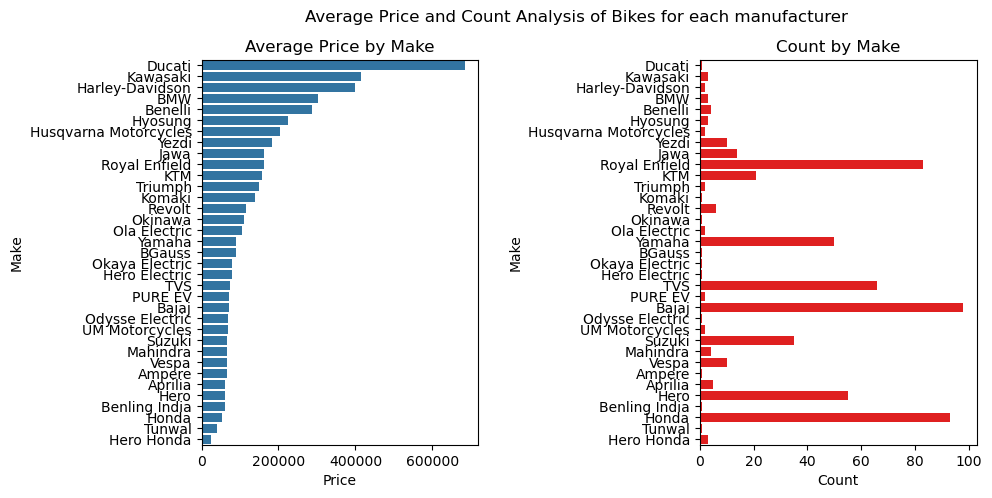

In [53]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.barplot(data=c.sort_values('Price',ascending=False),y='Make',x='Price',ax=axes[0])
sns.barplot(data=c.sort_values('Price',ascending=False),y='Make',x='Count',ax=axes[1],color='red')
axes[0].set_title('Average Price by Make')
axes[1].set_title('Count by Make')

plt.subplots_adjust(wspace=0.8)
fig.suptitle('Average Price and Count Analysis of Bikes for each manufacturer')
plt.show()



Text(0.5, 0.98, 'Plot between Average Price and Count of bikes for manufacturers')

<Figure size 400x400 with 0 Axes>

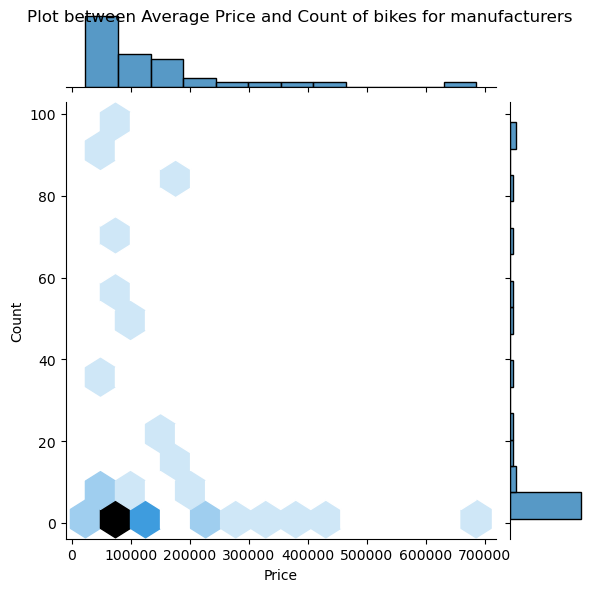

In [54]:
plt.figure(figsize=(4,4))

g=sns.jointplot(data=c,x='Price',y='Count',kind='hex')
g.fig.suptitle('Plot between Average Price and Count of bikes for manufacturers')

In [55]:
import plotly.express as px
fig = px.sunburst(fin,path=['Location','Make','Name'],values='Price',color='Location')
fig.show()

In [56]:
## top manufactures for average price
c.head(5)

,Make,Price,Count
0,Ducati,685000.00,1
1,Kawasaki,415000.00,3
2,Harley-Davidson,400000.00,2
3,BMW,303333.33,3
4,Benelli,287500.00,4


In [57]:
## top manufacturers based on count(availability), sorted by average price also.
c.sort_values('Count',ascending=False).head(5).sort_values('Price',ascending=False)

,Make,Price,Count
9,Royal Enfield,161267.47,83
20,TVS,73939.23,66
22,Bajaj,70580.09,98
30,Hero,61872.73,55
32,Honda,54232.25,93


In [58]:
'''here we can see that top manufacturers are Royal Enfield, TVS, Bajaj, Hero and Honda 
where Royal Enfield has highest average price and also highest count'''

'here we can see that top manufacturers are Royal Enfield, TVS, Bajaj, Hero and Honda \nwhere Royal Enfield has highest average price and also highest count'

<Axes: xlabel='Registration_Year', ylabel='Price'>

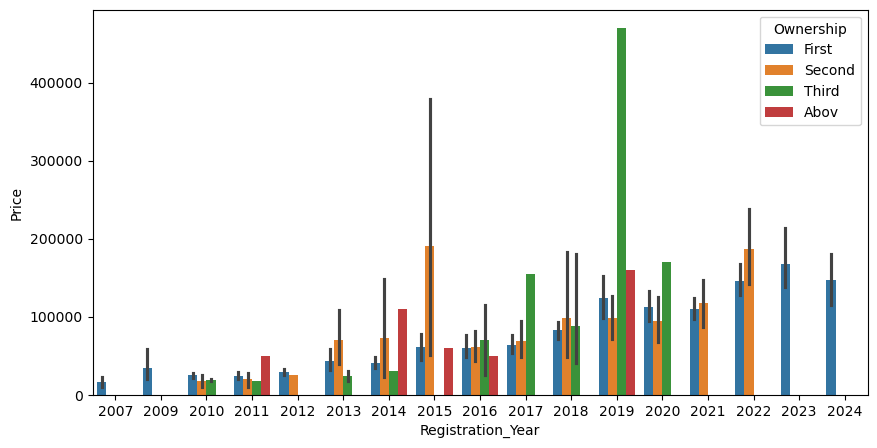

In [59]:
## trend of average price based on registration year
plt.figure(figsize=(10,5))
sns.barplot(data=fin,x='Registration_Year',y='Price',hue='Ownership',estimator='mean')

Here we can see there is huge difference for registrion year 2015 and 2019 for third and second hand bikes

<Axes: xlabel='Price', ylabel='Count'>

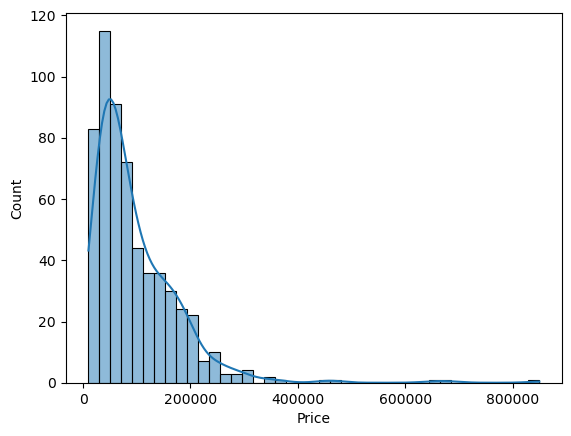

In [60]:
sns.histplot(fin.Price,kde=True)

In [61]:
# filter all ducati bikes
# for 2019
fin[fin.Registration_Year==2019].sort_values('Price',ascending=False).head(5)
#fin[fin.Registration_Year==2015].sort_values('Price',ascending=False)


,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
94,2019 Benelli TNT 600i BS4 ABS BS4,470000,Third,https://bikekharido.in/buy-used-bike/2019-bene...,2019,Benelli,TNT 600i BS4,20000,Petrol,600.0,Delhi
59,2019 Harley-Davidson Street 750 BS6,350000,First,https://bikekharido.in/buy-used-bike/2019-harl...,2019,Harley-Davidson,Street 750,10000,Petrol,0.0,Pune
333,2019 Royal Enfield Interceptor 650 Orange Crush,275000,First,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Interceptor 650,10000,Petrol,648.0,Vasai-Virar
466,2019 Royal Enfield Interceptor 650 Orange Crush,250000,First,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Interceptor 650,12300,Petrol,648.0,Bangalore
192,2019 Royal Enfield Interceptor 650 Silver Spectre,250000,First,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Interceptor 650,10000,Petrol,648.0,Kolkata


In [62]:
## for 2015
fin[fin.Registration_Year==2015].sort_values('Price',ascending=False).head(5)

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
112,2015 Ducati Monster 795 STD,685000,Second,https://bikekharido.in/buy-used-bike/2015-duca...,2015,Ducati,Monster 795,19200,Petrol,0.0,Delhi
229,2015 Benelli TNT 600i BS4 Limited Edition,340000,Second,https://bikekharido.in/buy-used-bike/2015-bene...,2015,Benelli,TNT 600i BS4,35000,Petrol,600.0,Coimbatore
187,2015 Royal Enfield Classic 350 Dark Series Wit...,140000,First,https://bikekharido.in/buy-used-bike/2015-roya...,2015,Royal Enfield,Classic 350,6000,Petrol,349.0,New Delhi
306,2015 KTM 390 Duke (2013-2016) STD,125000,First,https://bikekharido.in/buy-used-bike/2015-ktm-...,2015,KTM,390 Duke (2013-2016),16000,Petrol,373.2,Mumbai
294,2015 KTM RC 390,120000,First,https://bikekharido.in/buy-used-bike/2015-ktm-...,2015,KTM,RC 390,20000,Petrol,373.0,Hyderabad


In [63]:
fin.columns

Index(['Name', 'Price', 'Ownership', 'link', 'Registration_Year', 'Make',
       'Model', 'KMs_Driven', 'Fuel_Type', 'Engine', 'Location'],
      dtype='object')

In [64]:
# top 5 locations with avg price for bikes over all the years
fin.groupby('Location',)['Price'].mean().sort_values(ascending=False).head(5)

Location
Visakhapatnam     295000.0
Aurangabad        210000.0
Burdwan           190000.0
Coimbatore        190000.0
Varanasi          180000.0
Name: Price, dtype: float64

In [65]:
# last 5 locations with avg price for bikes over all the years
fin.groupby('Location',)['Price'].mean().sort_values(ascending=True).head(5)

Location
Dhule          20000.0
Chhindwara     20000.0
Kurnool        22000.0
Gorakhpur      22000.0
Agartala       24000.0
Name: Price, dtype: float64

<Axes: title={'center': 'Average Price over Registration Year'}, xlabel='Registration_Year', ylabel='Price'>

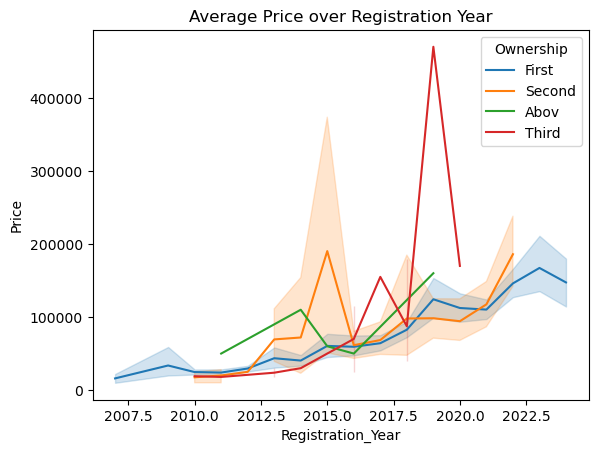

In [66]:
plt.title('Average Price over Registration Year')
sns.lineplot(data=fin,x='Registration_Year',y='Price',hue='Ownership',estimator='mean') ## this shows trend of incresing price.

In [67]:
## chekcking price difference for kms driven correlation
fin.corr(numeric_only=True)

,Price,Registration_Year,KMs_Driven,Engine
Price,1.000000,0.466148,-0.326594,0.457206
Registration_Year,0.466148,1.000000,-0.512771,0.041908
KMs_Driven,-0.326594,-0.512771,1.000000,-0.135618
Engine,0.457206,0.041908,-0.135618,1.000000


<Axes: title={'center': 'Multivariate Analysis'}>

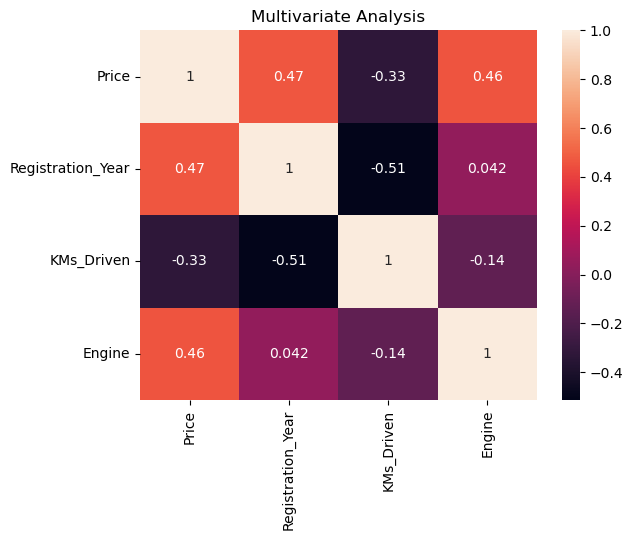

In [68]:
plt.title('Multivariate Analysis')
sns.heatmap(fin.corr(numeric_only=True),annot=True)

From here we can see as KMS driven increases price decreases and also for engine capacity and registration year there is a positive correlation

## Ownership relation

  Ownership  count
0     First    489
1    Second     80
2     Third     14
3      Abov      5


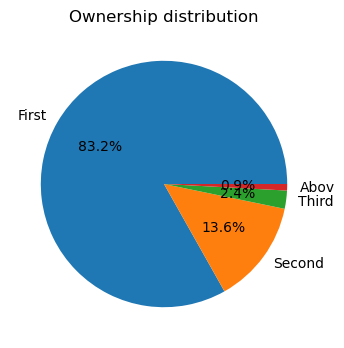

In [69]:
print(fin['Ownership'].value_counts().reset_index())


plt.figure(figsize=(6,4))
plt.title('Ownership distribution')
plt.title('Ownership distribution')
plt.pie(fin['Ownership'].value_counts().reset_index()['count'],labels=fin['Ownership'].value_counts().reset_index()['Ownership'],autopct='%1.1f%%')
plt.show()

Here majority of bikes are First hand ownership

<>:9: SyntaxWarning:

'int' object is not callable; perhaps you missed a comma?

<>:9: SyntaxWarning:

'int' object is not callable; perhaps you missed a comma?



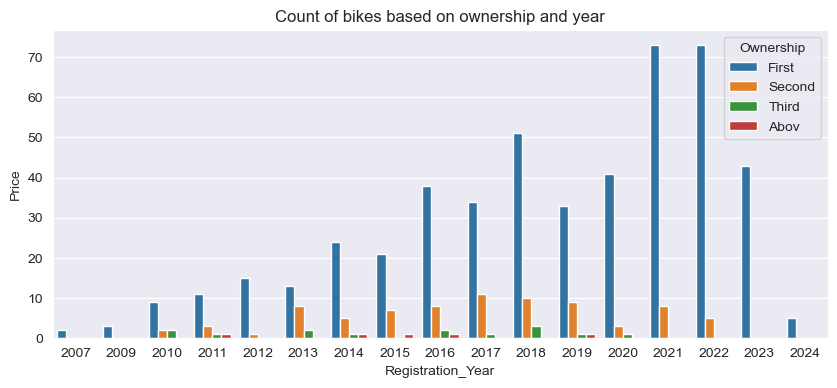

C:\Users\punee\AppData\Local\Temp\ipykernel_14760\3012946880.py:9: SyntaxWarning:

'int' object is not callable; perhaps you missed a comma?



TypeError: 'int' object is not callable

In [70]:
#fin.groupby(['Ownership','Registration_Year'])['Price'].count().reset_index()
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')
ax=sns.barplot(data=fin.groupby(['Ownership','Registration_Year'])['Price'].count().reset_index(),x='Registration_Year',y='Price',hue='Ownership')
ax.set_xlabel='Registration_Year'
ax.set_ylabel='count'
ax.set_title('Count of bikes based on ownership and year')
plt.show()
/96

Here we can see 2023 and 2024 and 2007 and 2009 have first hand bikes only

## REgistration Year 

In [ ]:
a=fin.Registration_Year.unique()
a.sort()
print(a)


[2007 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024]


    Registration_Year  Name
13               2021    81
14               2022    78
10               2018    64
8                2016    49
9                2017    46
12               2020    45
11               2019    44
15               2023    43
6                2014    31
7                2015    29
5                2013    23
3                2011    16
4                2012    16
2                2010    13
16               2024     5
1                2009     3
0                2007     2


<Axes: xlabel='Registration_Year', ylabel='Name'>

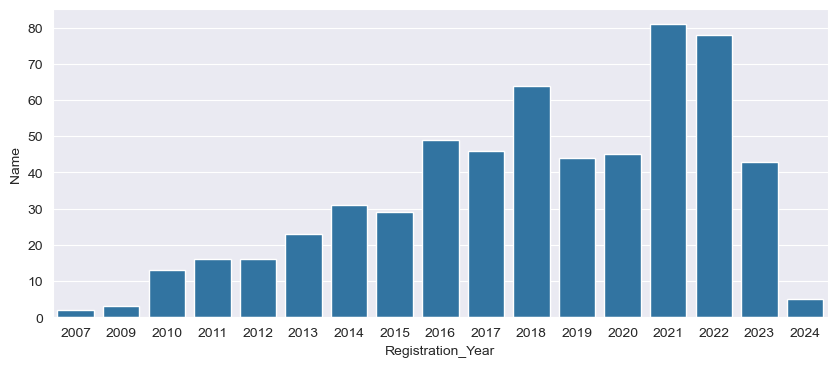

In [ ]:
print(fin.groupby('Registration_Year')['Name'].count().reset_index().sort_values('Name',ascending=False))
plt.figure(figsize=(10,4))
sns.barplot(data=fin.groupby('Registration_Year')['Name'].count().reset_index().sort_values('Name',ascending=False),x='Registration_Year',y='Name')


## Make and Model

In [ ]:
fin['Make'].value_counts().sort_values()

Make
Ampere                    1
Benling India             1
Ducati                    1
BGauss                    1
Odysse Electric           1
Okaya Electric            1
Okinawa                   1
Tunwal                    1
Hero Electric             1
Komaki                    1
Triumph                   2
PURE EV                   2
UM Motorcycles            2
Harley-Davidson           2
Ola Electric              2
Husqvarna Motorcycles     2
Hyosung                   3
Hero Honda                3
Kawasaki                  3
BMW                       3
Benelli                   4
Mahindra                  4
Aprilia                   5
Revolt                    6
Yezdi                    10
Vespa                    10
Jawa                     14
KTM                      21
Suzuki                   35
Yamaha                   50
Hero                     55
TVS                      66
Royal Enfield            83
Honda                    93
Bajaj                    98
Name: count, dt

In [ ]:
fin['Model'].value_counts()

Model
NTORQ 125             15
Classic 350           15
Bullet 350            14
Interceptor 650       11
Pulsar 150            11
                      ..
Splendor               1
Avenger 220 Street     1
Passion Pro BS4        1
GV650 Aquila Pro       1
CB125F                 1
Name: count, Length: 218, dtype: int64

<Axes: title={'center': 'Count of Bikes for each manufacturer'}, xlabel='count', ylabel='Make'>

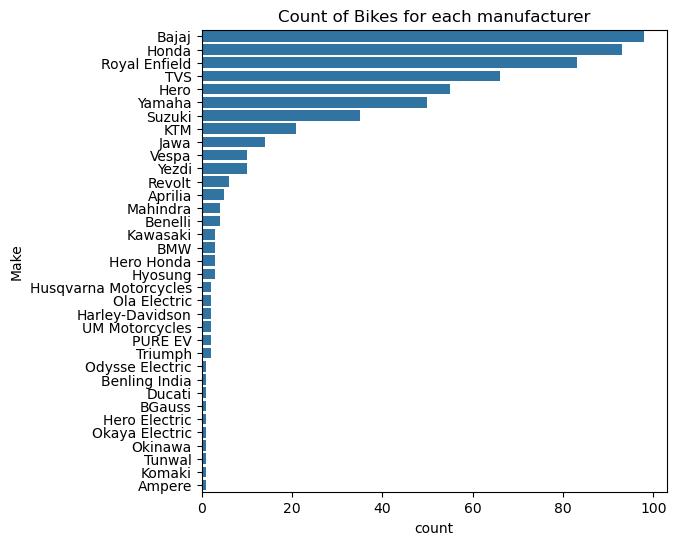

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Count of Bikes for each manufacturer')

sns.barplot(y=fin['Make'].value_counts().index,x=fin['Make'].value_counts())

## Fuel Type

In [ ]:
fin.Fuel_Type.value_counts()

Fuel_Type
Petrol    571
EV         17
Name: count, dtype: int64

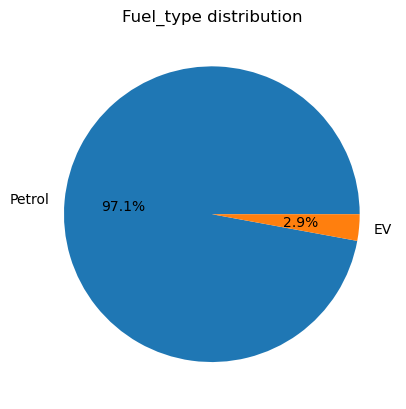

In [ ]:
plt.title('Fuel_type distribution')
plt.pie(fin.Fuel_Type.value_counts().reset_index()['count'],labels=fin.Fuel_Type.value_counts().reset_index()['Fuel_Type'],autopct='%1.1f%%')
plt.show()

## KMS driven

<Axes: xlabel='KMs_Driven', ylabel='Count'>

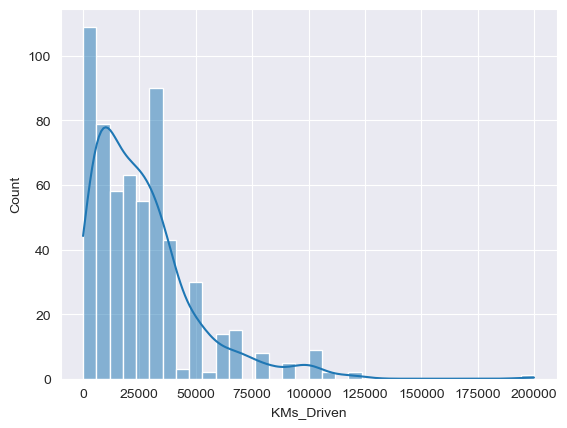

In [ ]:
sns.histplot(fin.KMs_Driven,kde=True)

most of the values lie between 10k to 50k

In [ ]:
fin.KMs_Driven.mean()

26453.331632653062

In [ ]:
fin.sort_values('KMs_Driven',ascending=False).head(5)

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
207,2011 Suzuki Access 125 Drum Brake CBS Special ...,18000,Third,https://bikekharido.in/buy-used-bike/2011-suzu...,2011,Suzuki,Access 125,200000,Petrol,124.0,Lucknow
26,2014 Royal Enfield Bullet 350 ES ABS BS4,110000,Abov,https://bikekharido.in/buy-used-bike/2014-roya...,2014,Royal Enfield,Bullet 350,120000,Petrol,346.0,Hubballi-Dharwad
376,2011 TVS Wego,20000,First,https://bikekharido.in/buy-used-bike/2011-tvs-...,2011,TVS,Wego,120000,Petrol,110.0,Agra
141,2017 Yamaha FZ S FI (V 2.0) STD,35000,First,https://bikekharido.in/buy-used-bike/2017-yama...,2017,Yamaha,FZ S FI (V 2.0),110000,Petrol,149.0,Hyderabad
574,2022 TVS Apache RTR 160 Disc,110000,First,https://bikekharido.in/buy-used-bike/2022-tvs-...,2022,TVS,Apache RTR 160,110000,Petrol,159.7,Delhi


In [ ]:
fin.sort_values('KMs_Driven').head(5)

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
363,2016 Honda CB Unicorn 160 Disc Brake,28000,First,https://bikekharido.in/buy-used-bike/2016-hond...,2016,Honda,CB Unicorn 160,0,Petrol,163.00,Kolkata
290,2022 Revolt RV400,120000,First,https://bikekharido.in/buy-used-bike/2022-revo...,2022,Revolt,RV400,273,EV,0.00,Pune
311,2022 Vespa ZX 125,110000,First,https://bikekharido.in/buy-used-bike/2022-vesp...,2022,Vespa,ZX 125,700,Petrol,124.45,Delhi
337,2022 Kawasaki Z650RS,650000,First,https://bikekharido.in/buy-used-bike/2022-kawa...,2022,Kawasaki,Z650RS,800,Petrol,649.00,Delhi
481,2023 Yamaha Aerox 155 MotoGP Edition,140000,First,https://bikekharido.in/buy-used-bike/2023-yama...,2023,Yamaha,Aerox 155,850,Petrol,125.00,Ranchi


## Engine

In [ ]:
fin.Engine.sort_values(ascending=False)
fin[fin.Engine>0].sort_values('Engine',ascending=False).head(5)

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
36,2015 Triumph Tiger 1200 GT Explorer,100000,Second,https://bikekharido.in/buy-used-bike/2015-triu...,2015,Triumph,Tiger 1200,30000,Petrol,1215.00,Bangalore
247,2014 Kawasaki Ninja 650,230000,Second,https://bikekharido.in/buy-used-bike/2014-kawa...,2014,Kawasaki,Ninja 650,30000,Petrol,649.00,Kolkata
337,2022 Kawasaki Z650RS,650000,First,https://bikekharido.in/buy-used-bike/2022-kawa...,2022,Kawasaki,Z650RS,800,Petrol,649.00,Delhi
10,2021 Suzuki Gixxer SF 250 Moto GP BS6,125000,Second,https://bikekharido.in/buy-used-bike/2021-suzu...,2021,Suzuki,Gixxer SF 250,25000,Petrol,648.72,Bangalore
437,2021 Royal Enfield Interceptor 650 Ravishing Red,300000,First,https://bikekharido.in/buy-used-bike/2021-roya...,2021,Royal Enfield,Interceptor 650,10000,Petrol,648.00,Bangalore


In [ ]:
fin.Engine.sort_values(ascending=False)
fin[fin.Engine>0].sort_values('Engine',ascending=True).head(5)

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
175,2018 TVS Scooty Pep Plus pep,28990,First,https://bikekharido.in/buy-used-bike/2018-tvs-...,2018,TVS,Scooty Pep Plus,10000,Petrol,87.8,Meerut
139,2022 TVS Scooty Pep Plus Glossy,55000,First,https://bikekharido.in/buy-used-bike/2022-tvs-...,2022,TVS,Scooty Pep Plus,20000,Petrol,87.8,Mumbai
341,2010 TVS Scooty Streak,20000,First,https://bikekharido.in/buy-used-bike/2010-tvs-...,2010,TVS,Scooty Streak,20000,Petrol,87.8,Chhindwara
190,2011 Hero Honda Splendor Pro,30000,First,https://bikekharido.in/buy-used-bike/2011-hero...,2011,Hero Honda,Splendor,100000,Petrol,97.2,Pune
194,2021 Hero Splendor Plus Black and Accent,65000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Splendor Plus,40000,Petrol,97.2,Faridabad


In [ ]:
f=pd.read_csv(r'C:\Users\punee\OneDrive\Desktop\python\web scraping\secondhandbike.csv',sep='|')
fdf=pd.DataFrame(f)
fdf=fdf.drop(columns='Unnamed: 0')
fdf

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,2023 Yezdi Roadster,165000,First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Roadster,10000,Petrol,0.0,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,110000,Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Thunderbird 350,40000,Petrol,0.0,Noida
2,2022 Hero Electric Optima CX Dual Battery,80000,First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Optima,5000,Petrol,0.0,Kolkata
3,2015 Mahindra Gusto DX,17000,First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Gusto,35000,Petrol,109.6,Mumbai
4,2014 Honda CB Trigger DLX,45000,First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,CB Trigger,30000,Petrol,0.0,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,35000,First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Hunk,70000,Petrol,149.0,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,63000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Passion Pro,15000,Petrol,110.0,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,100000,First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,FZS-FI V3,36000,Petrol,149.0,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,200000,First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Meteor 350,5000,Petrol,349.0,Kolkata


In [ ]:
fin

,Name,Price,Ownership,link,Registration_Year,Make,Model,KMs_Driven,Fuel_Type,Engine,Location
0,2023 Yezdi Roadster,165000,First,https://bikekharido.in/buy-used-bike/2023-yezd...,2023,Yezdi,Roadster,10000,Petrol,0.0,Delhi
1,2019 Royal Enfield Thunderbird 350 ABS,110000,Second,https://bikekharido.in/buy-used-bike/2019-roya...,2019,Royal Enfield,Thunderbird 350,40000,Petrol,0.0,Noida
2,2022 Hero Electric Optima CX Dual Battery,80000,First,https://bikekharido.in/buy-used-bike/2022-hero...,2022,Hero Electric,Optima,5000,Petrol,0.0,Kolkata
3,2015 Mahindra Gusto DX,17000,First,https://bikekharido.in/buy-used-bike/2015-mahi...,2015,Mahindra,Gusto,35000,Petrol,109.6,Mumbai
4,2014 Honda CB Trigger DLX,45000,First,https://bikekharido.in/buy-used-bike/2014-hond...,2014,Honda,CB Trigger,30000,Petrol,0.0,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
583,2016 Hero Hunk Double Disc,35000,First,https://bikekharido.in/buy-used-bike/2016-hero...,2016,Hero,Hunk,70000,Petrol,149.0,Ghaziabad
584,2021 Hero Passion Pro XTec Drum,63000,First,https://bikekharido.in/buy-used-bike/2021-hero...,2021,Hero,Passion Pro,15000,Petrol,110.0,Chennai
585,2021 Yamaha FZS-FI V3 STD Bluetooth,100000,First,https://bikekharido.in/buy-used-bike/2021-yama...,2021,Yamaha,FZS-FI V3,36000,Petrol,149.0,Ghaziabad
586,2022 Royal Enfield Meteor 350 Fireball,200000,First,https://bikekharido.in/buy-used-bike/2022-roya...,2022,Royal Enfield,Meteor 350,5000,Petrol,349.0,Kolkata


In [ ]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               588 non-null    object 
 1   Price              588 non-null    int32  
 2   Ownership          588 non-null    object 
 3   link               588 non-null    object 
 4   Registration_Year  588 non-null    int32  
 5   Make               588 non-null    object 
 6   Model              588 non-null    object 
 7   KMs_Driven         588 non-null    int64  
 8   Fuel_Type          588 non-null    object 
 9   Engine             588 non-null    float64
 10  Location           588 non-null    object 
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 46.1+ KB


In [ ]:
a=fin.Registration_Year.value_counts().reset_index()

<Axes: xlabel='Registration_Year', ylabel='count'>

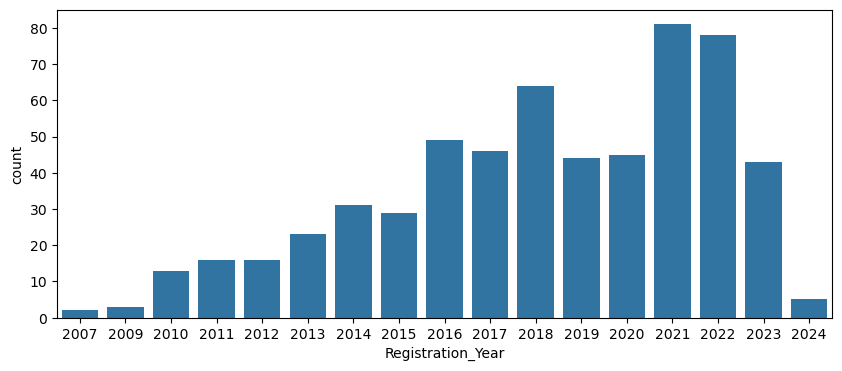

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(data=a,y='count',x='Registration_Year')


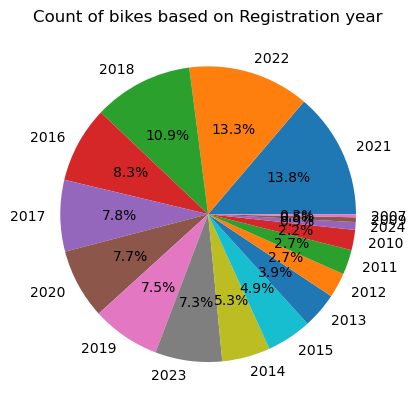

In [ ]:
plt.title('Count of bikes based on Registration year')
plt.pie(a['count'],labels=a['Registration_Year'],autopct='%1.1f%%')
plt.show()

In [81]:
fin.isna().sum()

Name                 0
Price                0
Ownership            0
link                 0
Registration_Year    0
Make                 0
Model                0
KMs_Driven           0
Fuel_Type            0
Engine               0
Location             0
dtype: int64